In [19]:
#Using Mall Customers dataset write C-means clustering algorithm from scratch.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:

data = pd.read_csv("Mall_Customers.csv")
data.head()
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]

In [22]:
import numpy as np

def custom_cmeans(X, k, max_iter=100, fuzziness=2):
    n_samples, n_features = X.shape

    def initialize_centroids(X, k):
        centroids = np.random.rand(k, n_features) * (X.max().values - X.min().values) + X.min().values
        return centroids


    centroids = initialize_centroids(X, k)

    for _ in range(max_iter):
        # the Euclidean distances between data points and centroids
        distances = calculate_distances(X, centroids)

        # Update membership matrix
        membership_matrix = update_membership(distances, fuzziness)

        # Update cluster centroids
        centroids = update_centroids(X, membership_matrix)

    # Assign samples to clusters based on the final membership matrix
    clusters = np.argmax(membership_matrix, axis=1)

    return clusters, centroids

# Helper function to calculate Euclidean distances
def calculate_distances(X, centroids):
    distances = np.sqrt(np.sum((X.values[:, None] - centroids[None, :]) ** 2, axis=2))
    return distances

# Helper function to update membership matrix
def update_membership(distances, fuzziness):                                   #membership_matrix[i, j] = 1 / (sum_j((distance[i, j] / distance[i, k]) ** (2 / (fuzziness - 1))))
    membership_matrix = 1 / (distances ** (2 / (fuzziness - 1)))
    membership_matrix /= np.sum(membership_matrix, axis=1, keepdims=True)
    return membership_matrix
1
# Helper function to update cluster centroids
def update_centroids(X, membership_matrix):
    centroids = np.dot(membership_matrix.T, X.values) / membership_matrix.sum(axis=0, keepdims=True).T
    return centroids


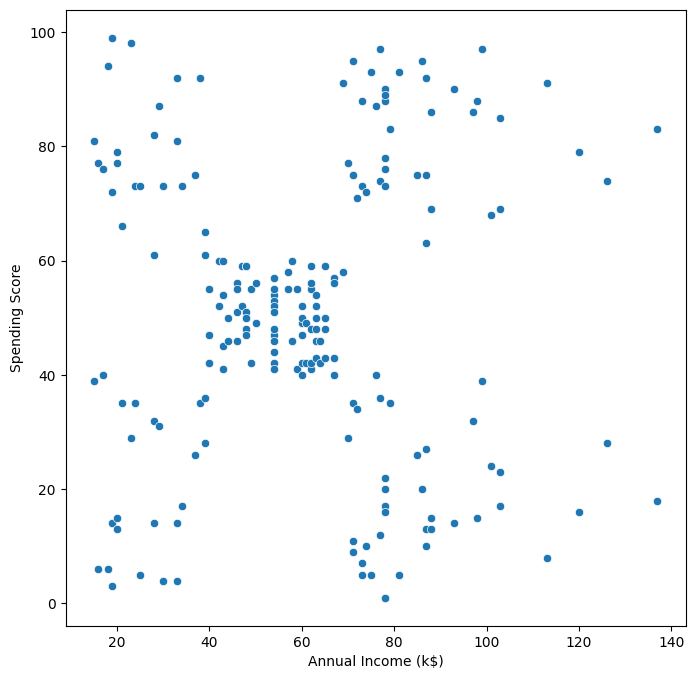

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [24]:

k = 4
clusters, centroids = custom_cmeans(X, k)


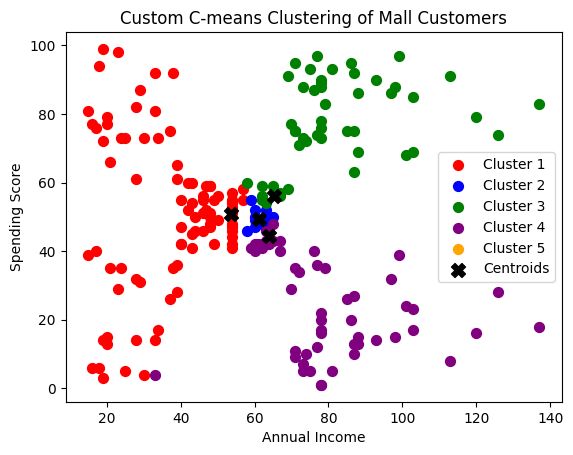

In [25]:

plt.scatter(X.iloc[clusters == 0, 0], X.iloc[clusters == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X.iloc[clusters == 1, 0], X.iloc[clusters == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X.iloc[clusters == 2, 0], X.iloc[clusters == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X.iloc[clusters == 3, 0], X.iloc[clusters == 3, 1], s=50, c='purple', label='Cluster 4')
plt.scatter(X.iloc[clusters == 4, 0], X.iloc[clusters == 4, 1], s=50, c='orange', label='Cluster 5')

plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroids', marker='X')  # Use 'X' marker for centroids

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Custom C-means Clustering of Mall Customers')
plt.legend()
plt.show()


In [26]:
#Elbow Method
def elbow_method(X, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters+1):
        clusters, centroids = custom_cmeans(X, k)
        inertia = 0
        for i in range(k):
            cluster_points = X[clusters == i].values
            if len(cluster_points) > 0:
                centroid = centroids[i]
                distances = ((cluster_points - centroid)**2).sum(axis=1)
                inertia += distances.sum()
        inertias.append(inertia)
    return inertias

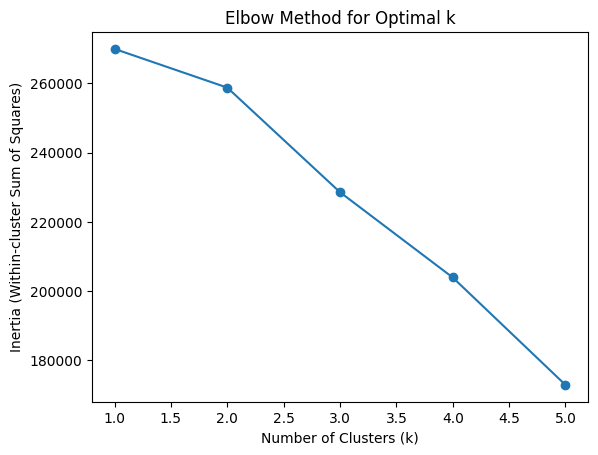

In [27]:


max_clusters = 5
inertias = elbow_method(X, max_clusters)

plt.plot(range(1, max_clusters+1), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()